In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

$S(t) + I(t) + R(t) = N$

$\dot{S}=-\alpha S$

$\dot{I}=\alpha S -\beta I$

$\dot{R} = \beta I$

In [13]:
alpha = 0.5
beta = 0.3
N = 1000000
S_0 = 990000
I_0 = 7000
R_0 = 3000
t_0 = 0
t_f = 25
t_steps = np.linspace(t_0, t_f, 100)
colors = ["blue", "red", "green"]

# Assume $I^{\star}$ is very small. Then model equations always work.

[9.89936983e+05 4.99969205e-01]
[1.47896281e+04 1.24331805e+06 3.81369787e-01]


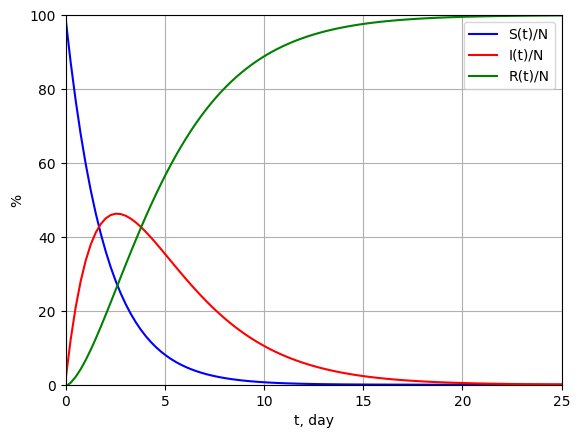

In [52]:
def dSdt(t, S):
    return -alpha*S

def dIdt(t, I):
    return alpha*S_fit(t) - beta*I

# solving diff equtation for S(t)
soln_S = solve_ivp(dSdt, (t_0, t_f), [S_0], t_eval=t_steps, dense_output=True)
S = soln_S.y[0]
S_fit = interpolate.interp1d(t_steps, S)
# solving diff equtation for I(t)
soln_I = solve_ivp(dIdt, (t_0, t_f), [I_0], t_eval=t_steps, dense_output=True)
I = soln_I.y[0]


def S_model(t, s0, a):
    return s0*np.exp(-a*t)

def diff_S(p, y, t):
    s0, a = p
    return y - S_model(t, s0, a)

def I_model(t, i0, s0, a):
    return (i0+a*s0*t)*np.exp(-a*t)

def diff_I(p, y, t):
    i0, s0, a = p
    return y - I_model(t, i0, s0, a)

p0 = (S_0, alpha)
aprx_s, _ = scipy.optimize.leastsq(diff_S, p0, args=(S, t_steps))
print(aprx_s)
S_leastsq = S_model(t_steps, *aprx_s)

p0 = (I_0, S_0, beta)
aprx_i, _ = scipy.optimize.leastsq(diff_I, p0, args=(I, t_steps))
print(aprx_i)
I_leastsq = I_model(t_steps, *aprx_i)

R_leastsq = N - S_leastsq - I_leastsq
plt.plot(t_steps, S_leastsq/N*100, color=colors[0], label="S(t)/N")
plt.plot(t_steps, I_leastsq/N*100, color=colors[1], label="I(t)/N")
plt.plot(t_steps, R_leastsq/N*100, color=colors[2], label="R(t)/N")
plt.ylim([0,100])
plt.xlim([t_0,t_f])
plt.xlabel("t, day")
plt.ylabel("%")
plt.grid()
plt.legend()



# $I(t_{max})$ is maximal

In [51]:
t_max = scipy.optimize.minimize_scalar(lambda x: -I_model(x, *aprx_i)).x
print(f"t_max = {t_max} days")

t_max = 2.590935960224608 days
